In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from skimage import segmentation, measure, filters
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import rasterio
from rasterio.plot import show

In [2]:
from obia_routine import load_image, image_segmentation, calculate_ndvi, classify_land_cover, visualization

In [3]:
image_path = r'_data\S2_RGB_NIR_202406_2.tif'

In [4]:
image = load_image(image_path)[0]

Loaded Sentinel-2 image with bands: ['B4', 'B3', 'B2', 'B8']
Image shape: (1482, 1825, 4)


In [5]:
segments = image_segmentation(image, n_segments=2000, compactness=1, sigma=3)[0]

Segmentation complete: 1507 segments created


In [6]:
ndvi = calculate_ndvi(image, red_band_idx=0, nir_band_idx=3)

In [7]:
classification = classify_land_cover(image, segments, vegetation_threshold=0.1, water_threshold=0.05, 
                       red_band_idx=0, nir_band_idx=3, use_ndvi=True)[0]

Using NDVI with Red band 0 (B4) and NIR band 3 (B8)
Classification complete:
  Vegetation: 64.1%
  Water: 34.8%
  Other: 1.1%
  NDVI range: -1.000 to 0.853
  Mean NDVI: 0.232


(<Figure size 1500x1000 with 5 Axes>,
 array([[<Axes: title={'center': 'Original Sentinel-2 Image (RGB: B4,B3,B2)'}>,
         <Axes: title={'center': 'Image Segmentation (1507 segments)'}>],
        [<Axes: title={'center': 'Land Cover Classification'}>,
         <Axes: title={'center': 'Classification Overlay'}>]], dtype=object))

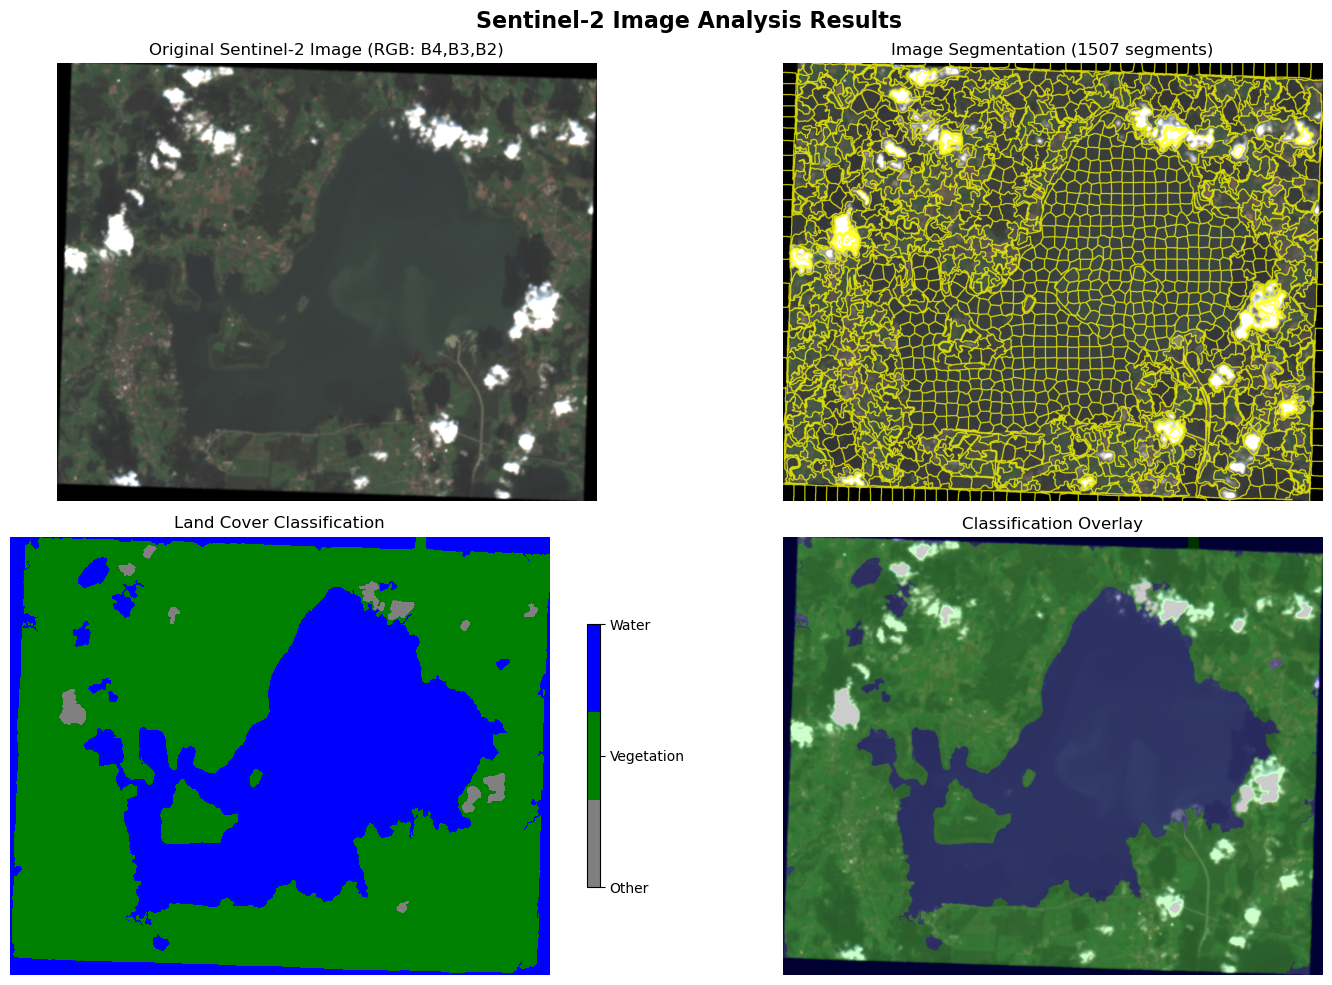

In [8]:
visualization(image, segments, classification, figsize=(15, 10))